# **Practical 6**

# **CNN Implementation with Tensorflow & Keras**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report

In [ ]:
data=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
type(data[1][1])

numpy.ndarray

In [ ]:
(X_train, y_train),(X_test, y_test)=data

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

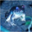

In [ ]:
cv2_imshow(X_train[0])

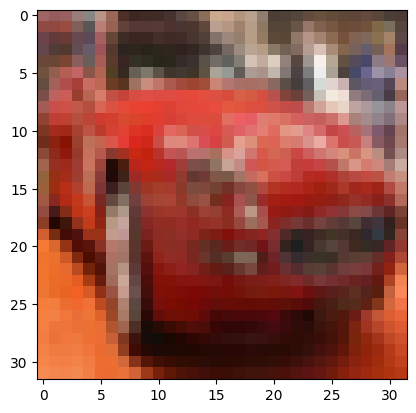

In [ ]:
plt.imshow(X_train[5])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def display_image(X,y,index):
  plt.figure(figsize=(2,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

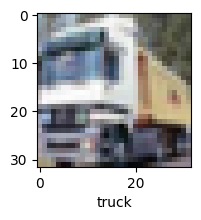

In [ ]:
display_image(X_train,y_train,1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

ANN

In [ ]:
ann_model=keras.Sequential([
                            #ANN
                            keras.layers.Flatten(input_shape=(32,32,3)),
                            keras.layers.Dense(1000,activation="relu"),
                            keras.layers.Dense(1000,activation="relu"),
                            keras.layers.Dense(100,activation="sigmoid"),
                            ])
ann_model.compile(optimizer="adam",
              loss="SparseCategoricalCrossentropy",
              metrics=["accuracy"])
ann_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.8635 - accuracy: 0.3288
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6680 - accuracy: 0.4006
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5832 - accuracy: 0.4330
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5355 - accuracy: 0.4477
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5017 - accuracy: 0.4645
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4674 - accuracy: 0.4747
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4472 - accuracy: 0.4815
Epoch 8/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4188 - accuracy: 0.4924
Epoch 9/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.3982 - accuracy: 0.4977
Epoch 10/10
1563/1563 [==============================] - 94s 6

In [ ]:
ann_model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4548 - accuracy: 0.4812


[1.4548438787460327, 0.4812000095844269]

In [ ]:
y_pred=ann_model.predict(X_test)
print(y_pred[0])
y_pred_classes=[np.argmax(i) for i in y_pred]
print(y_pred_classes[0])
print(classification_report)

313/313 [==============================] - 4s 11ms/step
[4.1550243e-01 3.0329856e-01 3.9775202e-01 7.3530829e-01 6.5288752e-01
 6.3541991e-01 5.0959378e-01 1.6284077e-01 4.2754042e-01 1.5099335e-01
 4.0994511e-10 3.5807166e-10 2.0145316e-10 1.6319590e-10 5.2593335e-10
 6.5788397e-10 2.5881311e-10 4.7830551e-10 4.0206205e-10 5.1624316e-10
 2.1924916e-10 6.6955569e-10 6.1141442e-10 3.3495842e-10 6.0599481e-10
 4.5442958e-10 3.4603109e-10 2.8743288e-10 2.7481498e-10 2.6262623e-10
 4.0000292e-10 3.7585327e-10 4.1775158e-10 3.4200623e-10 4.1049827e-10
 4.5181606e-10 2.0301381e-10 2.6117905e-10 5.6893318e-10 4.4125884e-10
 4.6750365e-10 2.0785867e-10 4.5889872e-10 3.3039432e-10 6.8955247e-10
 4.3810897e-10 3.2141570e-10 5.6091454e-10 3.3235428e-10 2.9475247e-10
 2.6074551e-10 2.9325803e-10 1.7717314e-10 3.3642852e-10 3.2268105e-10
 3.1724420e-10 6.1556837e-10 4.0040291e-10 2.4061769e-10 3.5175995e-10
 4.3971463e-10 3.5464598e-10 1.8826316e-09 2.2435948e-10 2.9124350e-10
 2.5975919e-10 4.6305

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

CNN

In [ ]:
cnn_model=keras.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Flatten(),
                            ])
cnn_model.compile(optimizer="adam",
              loss="SparseCategoricalCrossentropy",
              metrics=["accuracy"])
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 12.8891 - accuracy: 9.6000e-04
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 12.8497 - accuracy: 7.0000e-04
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 12.6721 - accuracy: 0.0101
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 8.8833 - accuracy: 0.0999
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 8.8822 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 8.8821 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 8.8821 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 8.8819 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 8.8818 - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================

In [ ]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 8.8818 - accuracy: 0.1000


[8.8818359375, 0.10000000149011612]

In [ ]:
y_pred=cnn_model.predict(X_test)
print(y_pred[0])
y_pred_classes = [np.argmax(i) for i in y_pred]
print(y_pred_classes[0])
report = classification_report(y_test, y_pred_classes)
print(report)

313/313 [==============================] - 5s 15ms/step
[0. 0. 0. ... 0. 0. 0.]
0
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
